Segunda Atividade Prática

Disciplina - Computação Bioinspirada

Alunos:

Nicolli Carvalho Fretias - 11911BSI241

Victor Hugo Buiatti Marçal - 11911BSI216

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # Usada para separar dados de treino e teste
# import random
import matplotlib.pyplot as plt # Usada para plotar os graficos

# Carregar os dados Iris
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

# Pegando duas classes para classificação (Iris-setosa e Iris-versicolor)
y = iris_data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Usando o tamanho da pétala e o tamanho da sépala.
x = np.array(iris_data.iloc[0:100, [0,2]].values)

# Armazenar as taxas de erro
errors_ = []


# Função para treinar o perceptron
def train_perceptron(x, y, learning_rate=0.01, epochs=10):
    # Iniciando os pesos randomicamente
    weights = np.random.rand(1 + x.shape[1]) - 0.5
    print("Pesos Iniciais: ",weights)
    # Adicionando o valor 1 em todos os dados de x para nao alterar o bias dos pesos
    x_with_bias = np.hstack((np.ones((x.shape[0], 1)), x))
    # print(x_with_bias) # Debug

    for epoch in range(epochs):
        errors = 0
        for i in range(len(y)):
            xi = x_with_bias[i]
            yi = y[i]
            # Calculando o produto escalar
            z = np.dot(weights, xi)

            predicted_class = 1 if z > 0 else -1

            # Funcao de erro para atualizacao dos pesos
            error = (yi - predicted_class)
            errors += int(error != 0.0)
            # Atualizando os pesos
            weights =[weights[j] + learning_rate * error * xi[j] for j in range(3)]
        # Salvando os erros da epoca (utilizado apenas para analise grafica)
        errors_.append(errors)
    return weights


# Separando de forma aleatoria os dados de treinamento e teste
# Para alterar o tamanho desejado dos dados de treinamento basta alterar o argumento 'train_size'
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.5)

# Treinando o perceptron
train_weights = train_perceptron(train_x, train_y)
print("Pesos apos treinamento: ", train_weights)


# Função para fazer previsões usando os pesos aprendidos
def predict(x, y, weights):
    predictions = []
    x_with_bias = np.hstack((np.ones((x.shape[0], 1)), x))
    for i in range(len(y)):
        xi = x_with_bias[i]
        z = np.dot(weights, xi)
        predicted_class = 1 if z > 0 else -1
        predictions.append(predicted_class)
    return np.array(predictions)


# Fazendo previsões utilizando o conjunto de teste
predictions = predict(test_x, test_y, train_weights)

# print(errors_) # Debug

# Calculando a precisão do modelo
accuracy = np.mean(predictions == test_y)
print("Precisão do modelo:", accuracy)


Pesos Iniciais:  [-0.23193865 -0.05401155  0.00551177]
Pesos apos treinamento:  [-0.2319386505806642, -0.012011554700450039, 0.1415117709748488]
Precisão do modelo: 1.0


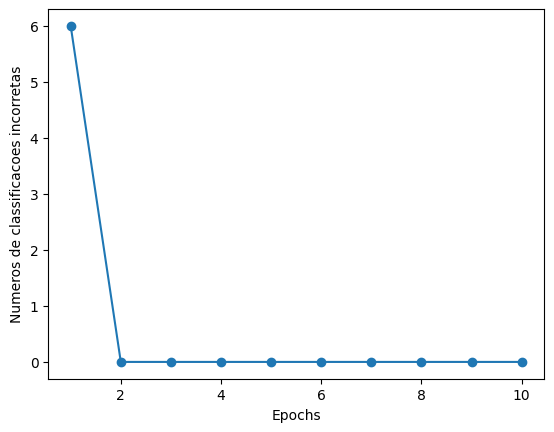

In [2]:
# Plotando um grafico dos erros por epoca
plt.plot(range(1, len(errors_) + 1), errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Numeros de classificacoes incorretas')
plt.show()

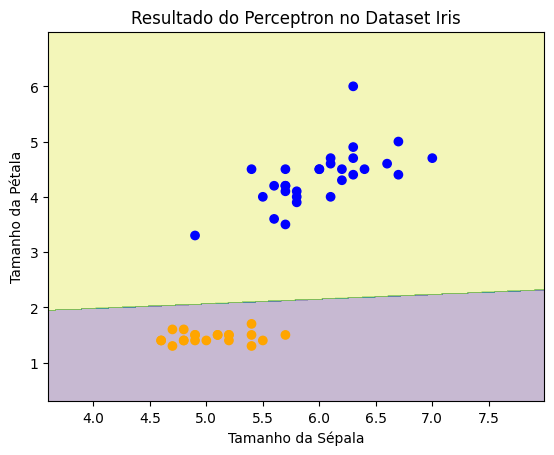

In [3]:
# Função para plotar os resultados obtidos
def plot_results_perceptron(X, y, weights):
    # Encontrando os limites para o eixo x e y, aumentados em 1 para margem
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Cria uma grade de pontos com intervalo de 0.01 entre os limites
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Fazendo previsões para cada ponto na grade usando a função predict
    Z = predict(np.c_[xx.ravel(), yy.ravel()], np.zeros(xx.ravel().shape), weights)
    # Remodelando as previsões para a forma da grade
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plotando os pontos de dados no gráfico com cores diferentes para cada classe
    plt.scatter(X[:, 0], X[:, 1], c=['blue' if label == 1 else 'orange' for label in y], marker='o')
    plt.xlabel('Tamanho da Sépala')
    plt.ylabel('Tamanho da Pétala')
    plt.title('Resultado do Perceptron no Dataset Iris')
    plt.show()


plot_results_perceptron(test_x, test_y, train_weights)